Name : Ramya Gopinath

USC ID : 4595082262

Github username : ramyagopinath08

In [1412]:
#import statements
import pandas as pd
import numpy as np
import math
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import DistanceMetric

1(a) Download the Vertebral Column Data Set

In [1413]:
#read the data
path = '../Data/vertebral_column_data/column_2C.dat'
df1 = pd.read_csv(path, sep = ",", header = None)
df1.head()

,0
0,63.03 22.55 39.61 40.48 98.67 -0.25 AB
1,39.06 10.06 25.02 29 114.41 4.56 AB
2,68.83 22.22 50.09 46.61 105.99 -3.53 AB
3,69.3 24.65 44.31 44.64 101.87 11.21 AB
4,49.71 9.65 28.32 40.06 108.17 7.92 AB


In [1414]:
#preprocessing data
df1 = df1.rename(columns={0: "column_names"})
# df1.head(10)

In [1415]:
vertebral_df = df1["column_names"].str.split(" ", n = 7, expand = True)
df1["Plevic incidence"] = vertebral_df[0]
df1["Plevic tilt"]= vertebral_df[1]
df1["Lumbar lordosis angle"]= vertebral_df[2]
df1["Sacral scope"]= vertebral_df[3]
df1["Pelvic radius"]= vertebral_df[4]
df1["number"]= vertebral_df[5]
df1["Grade of Spondylolisthesis"]= vertebral_df[6]
# vertebral_df

In [1416]:
vertebral_df = vertebral_df.rename(columns={0: "Plevic incidence", 1: "Plevic tilt", 2: "Lumbar angle", 3: "Sacral scope", 4: "Pelvic radius", 5: "Grade of Spondylolisthesis", 6: "Class"})
vertebral_df.head()

,Plevic incidence,Plevic tilt,Lumbar angle,Sacral scope,Pelvic radius,Grade of Spondylolisthesis,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.3,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [1417]:
vertebral_df["Plevic incidence"] = pd.to_numeric(vertebral_df['Plevic incidence'])
vertebral_df["Plevic tilt"] = pd.to_numeric(vertebral_df['Plevic tilt'])
vertebral_df["Lumbar angle"] = pd.to_numeric(vertebral_df['Lumbar angle'])
vertebral_df["Sacral scope"] = pd.to_numeric(vertebral_df['Sacral scope'])
vertebral_df["Pelvic radius"] = pd.to_numeric(vertebral_df['Pelvic radius'])
vertebral_df["Grade of Spondylolisthesis"] = pd.to_numeric(vertebral_df['Grade of Spondylolisthesis'])
# vertebral_df.dtypes

In [1418]:
vertebral_df['Class_BC'] = np.where(vertebral_df['Class'] == 'AB', 1, 0)
vertebral_df.head()

,Plevic incidence,Plevic tilt,Lumbar angle,Sacral scope,Pelvic radius,Grade of Spondylolisthesis,Class,Class_BC
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB,1
1,39.06,10.06,25.02,29.00,114.41,4.56,AB,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB,1
3,69.30,24.65,44.31,44.64,101.87,11.21,AB,1
4,49.71,9.65,28.32,40.06,108.17,7.92,AB,1


1(b)(i) Make scatterplots of the independent variables in the dataset. Use color to
show Classes 0 and 1.

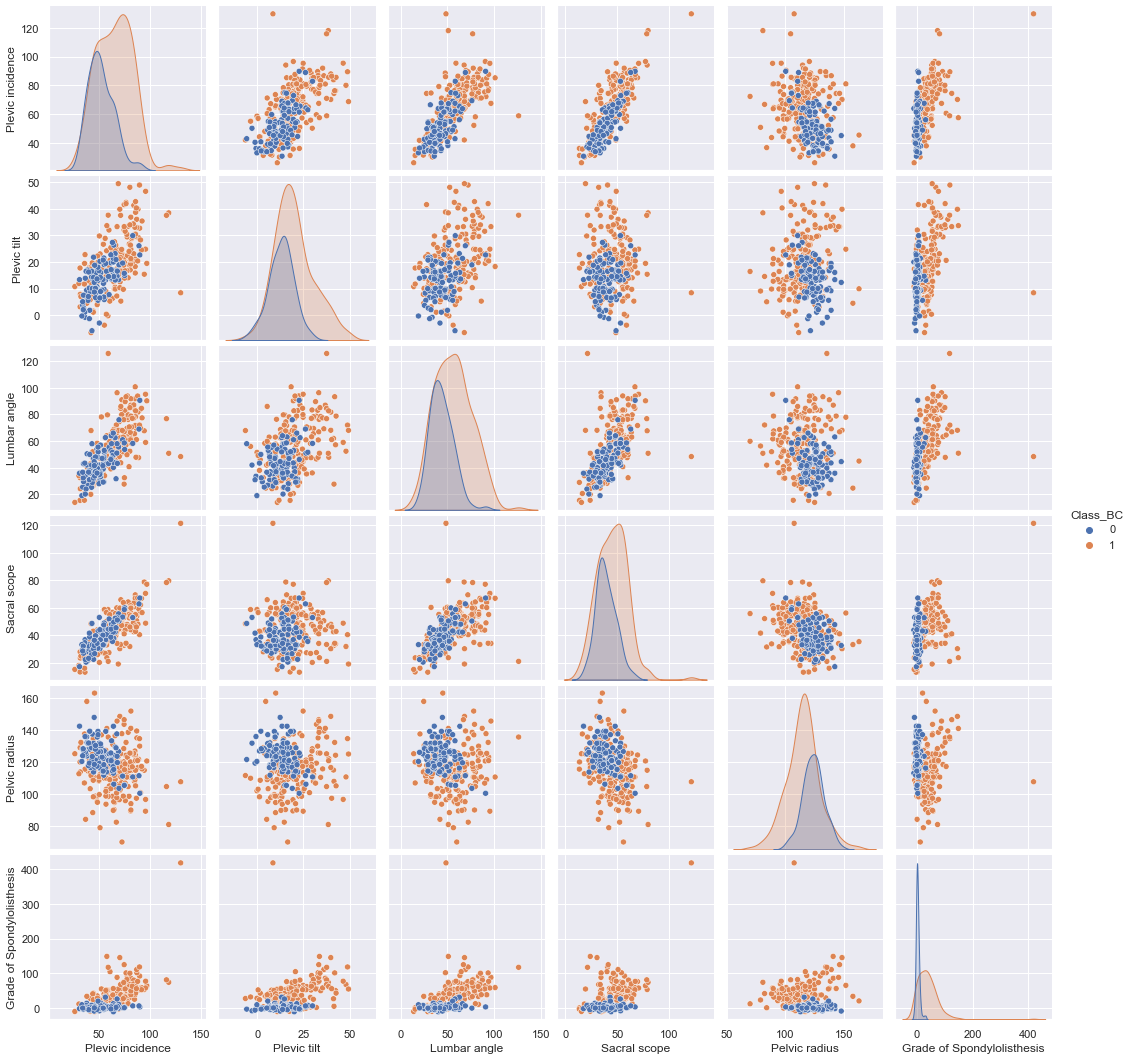

In [1419]:
sns.set_theme()
sns.pairplot(vertebral_df, hue = "Class_BC")

1(b)(ii) Make boxplots for each of the independent variables. Use color to show
Classes 0 and 1

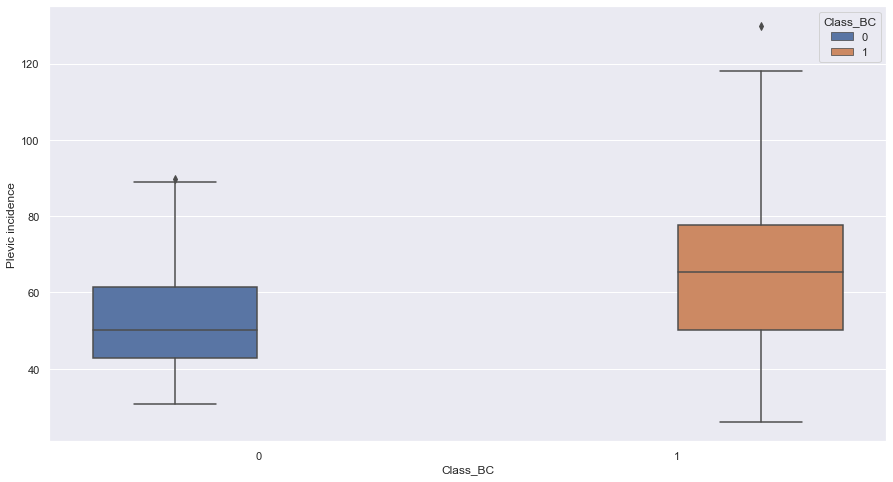

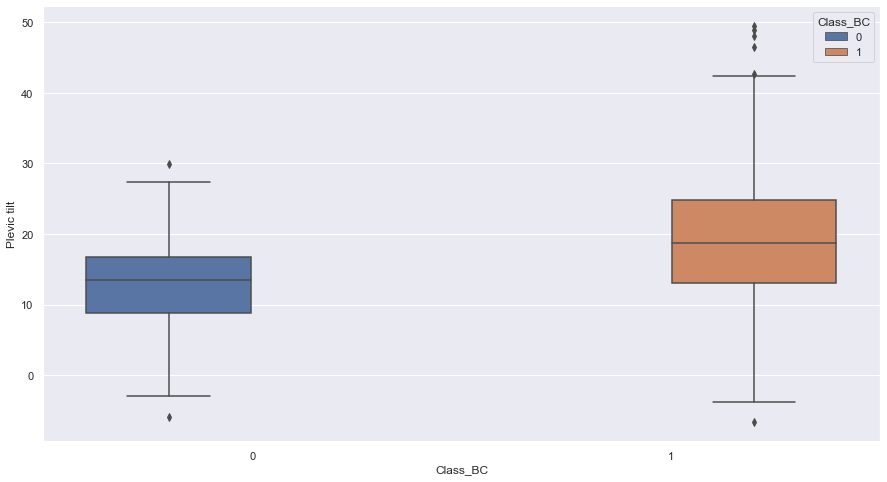

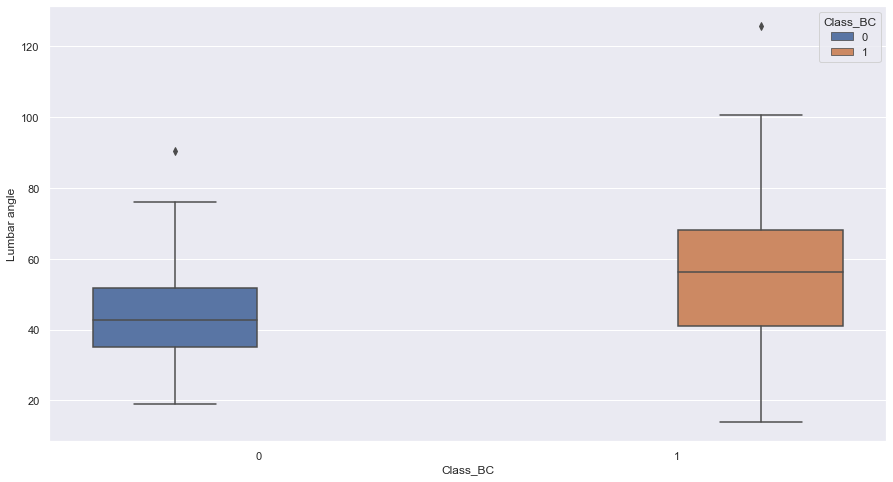

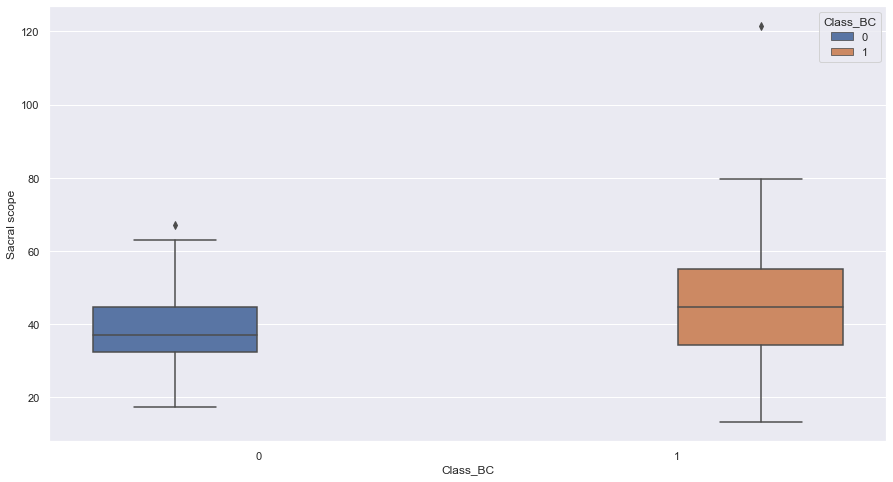

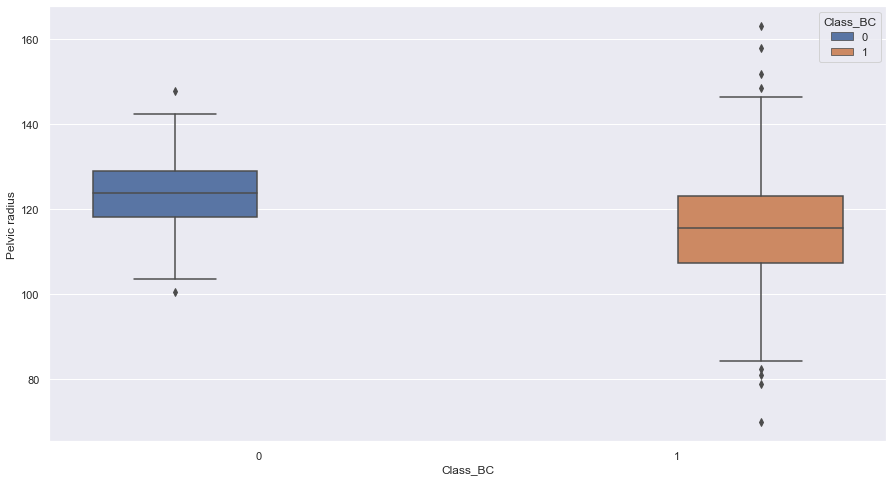

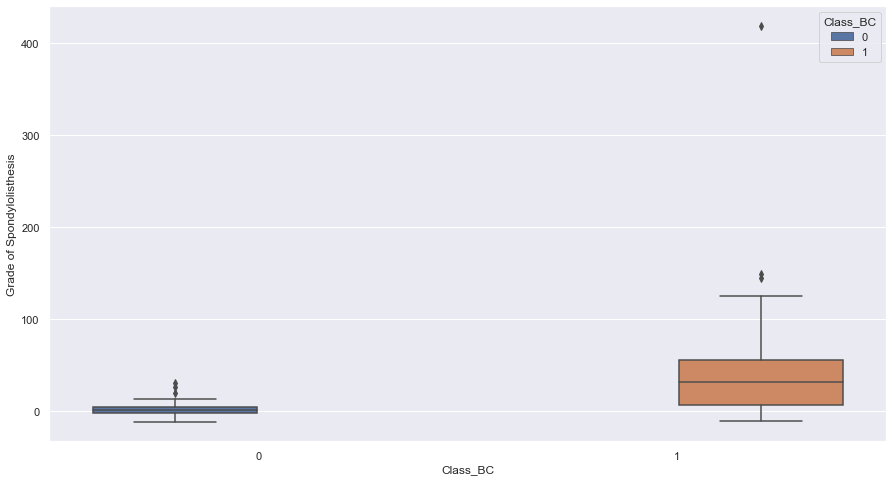

In [1420]:
sns.set(rc = {'figure.figsize':(15,8)})
for i in vertebral_df.iloc[:,:6]:
    sns.boxplot(x = "Class_BC", hue="Class_BC", y= i , data=vertebral_df)
    plt.show()

1(b)(iii) Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
training set and the rest of the data as the test set

In [1421]:
abnormal_df = vertebral_df[vertebral_df['Class_BC'] == 1]
abnormal_df.head()

,Plevic incidence,Plevic tilt,Lumbar angle,Sacral scope,Pelvic radius,Grade of Spondylolisthesis,Class,Class_BC
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB,1
1,39.06,10.06,25.02,29.00,114.41,4.56,AB,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB,1
3,69.30,24.65,44.31,44.64,101.87,11.21,AB,1
4,49.71,9.65,28.32,40.06,108.17,7.92,AB,1


In [1422]:
normal_df = vertebral_df[vertebral_df['Class_BC'] == 0]
normal_df.head()

,Plevic incidence,Plevic tilt,Lumbar angle,Sacral scope,Pelvic radius,Grade of Spondylolisthesis,Class,Class_BC
210,38.51,16.96,35.11,21.54,127.63,7.99,NO,0
211,54.92,18.97,51.60,35.95,125.85,2.00,NO,0
212,44.36,8.95,46.90,35.42,129.22,4.99,NO,0
213,48.32,17.45,48.00,30.87,128.98,-0.91,NO,0
214,45.70,10.66,42.58,35.04,130.18,-3.39,NO,0


In [1423]:
abnormal_df_train = abnormal_df.iloc[:140,:]
abnormal_df_train.head()

,Plevic incidence,Plevic tilt,Lumbar angle,Sacral scope,Pelvic radius,Grade of Spondylolisthesis,Class,Class_BC
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB,1
1,39.06,10.06,25.02,29.00,114.41,4.56,AB,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB,1
3,69.30,24.65,44.31,44.64,101.87,11.21,AB,1
4,49.71,9.65,28.32,40.06,108.17,7.92,AB,1


In [1424]:
normal_df_train = normal_df.iloc[:70,:]
normal_df_train.head()

,Plevic incidence,Plevic tilt,Lumbar angle,Sacral scope,Pelvic radius,Grade of Spondylolisthesis,Class,Class_BC
210,38.51,16.96,35.11,21.54,127.63,7.99,NO,0
211,54.92,18.97,51.60,35.95,125.85,2.00,NO,0
212,44.36,8.95,46.90,35.42,129.22,4.99,NO,0
213,48.32,17.45,48.00,30.87,128.98,-0.91,NO,0
214,45.70,10.66,42.58,35.04,130.18,-3.39,NO,0


In [1425]:
abnormal_df_test = abnormal_df.iloc[140:,:]
abnormal_df_test.head()

,Plevic incidence,Plevic tilt,Lumbar angle,Sacral scope,Pelvic radius,Grade of Spondylolisthesis,Class,Class_BC
140,69.56,15.40,74.44,54.16,105.07,29.70,AB,1
141,89.50,48.90,72.00,40.60,134.63,118.35,AB,1
142,85.29,18.28,100.74,67.01,110.66,58.88,AB,1
143,60.63,20.60,64.54,40.03,117.23,104.86,AB,1
144,60.04,14.31,58.04,45.73,105.13,30.41,AB,1


In [1426]:
normal_df_test = normal_df.iloc[70:,:]
normal_df_test.head()

,Plevic incidence,Plevic tilt,Lumbar angle,Sacral scope,Pelvic radius,Grade of Spondylolisthesis,Class,Class_BC
280,50.09,13.43,34.46,36.66,119.13,3.09,NO,0
281,64.26,14.50,43.90,49.76,115.39,5.95,NO,0
282,53.68,13.45,41.58,40.24,113.91,2.74,NO,0
283,49.00,13.11,51.87,35.88,126.40,0.54,NO,0
284,59.17,14.56,43.20,44.60,121.04,2.83,NO,0


In [1427]:
df_train = pd.concat([abnormal_df_train,normal_df_train])
df_train.head()

,Plevic incidence,Plevic tilt,Lumbar angle,Sacral scope,Pelvic radius,Grade of Spondylolisthesis,Class,Class_BC
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB,1
1,39.06,10.06,25.02,29.00,114.41,4.56,AB,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB,1
3,69.30,24.65,44.31,44.64,101.87,11.21,AB,1
4,49.71,9.65,28.32,40.06,108.17,7.92,AB,1


In [1428]:
df_test = pd.concat([abnormal_df_test,normal_df_test])
df_test.head()

,Plevic incidence,Plevic tilt,Lumbar angle,Sacral scope,Pelvic radius,Grade of Spondylolisthesis,Class,Class_BC
140,69.56,15.40,74.44,54.16,105.07,29.70,AB,1
141,89.50,48.90,72.00,40.60,134.63,118.35,AB,1
142,85.29,18.28,100.74,67.01,110.66,58.88,AB,1
143,60.63,20.60,64.54,40.03,117.23,104.86,AB,1
144,60.04,14.31,58.04,45.73,105.13,30.41,AB,1


In [1429]:
x_train = df_train.iloc[:,:6]
y_train = df_train.iloc[:,7:]
x_test = df_test.iloc[:,:6]
y_test = df_test.iloc[:,7:]

1(c)(i) Write code for k-nearest neighbors with Euclidean metric(eg. k = 3)

In [1430]:
knnclasstrain = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
knnclasstrain.fit(x_train,y_train.values.ravel())
predictedknn = knnclasstrain.predict(x_test)
print(predictedknn)
print("Accuracy : " , accuracy_score(y_test,predictedknn))
cmatrix = confusion_matrix(y_test,predictedknn)
print("Confusion matrix \n", cmatrix)
precisionscore = precision_score(y_test,predictedknn)
print("Precision score : " , precisionscore)
f1score = f1_score(y_test,predictedknn)
print("f1score : ", f1score)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0]
Accuracy :  0.92
Confusion matrix 
 [[23  7]
 [ 1 69]]
Precision score :  0.9078947368421053
f1score :  0.9452054794520548


1(c)(ii) Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smallerincrements of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision,and F1-score when k = k∗

In [1431]:
testing_error = []
train_error = []
for k in range(208,0,-3):
    knnclasstrain = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    knnclasstrain.fit(x_train,y_train.values.ravel())
    predictedknn = knnclasstrain.predict(x_test)
    accscores.append(metrics.accuracy_score(y_test,predictedknn))
    
    predictedknn_test = knnclasstrain.predict(x_test)
    test_cmatrix = confusion_matrix(y_test,predictedknn_test)
    testing_error.append((test_cmatrix[1][0] + test_cmatrix[0][1])/(test_cmatrix[0][0] + test_cmatrix[0][1] + test_cmatrix[1][0] + test_cmatrix[1][1]))
    
    predictedknn_train = knnclasstrain.predict(x_train)
    train_cmatrix = confusion_matrix(y_train,predictedknn_train)
    train_error.append((train_cmatrix[1][0] + train_cmatrix[0][1])/(train_cmatrix[0][0] + train_cmatrix[0][1] + train_cmatrix[1][0] + train_cmatrix[1][1]))
    
# print(testing_error)
# print(train_error)

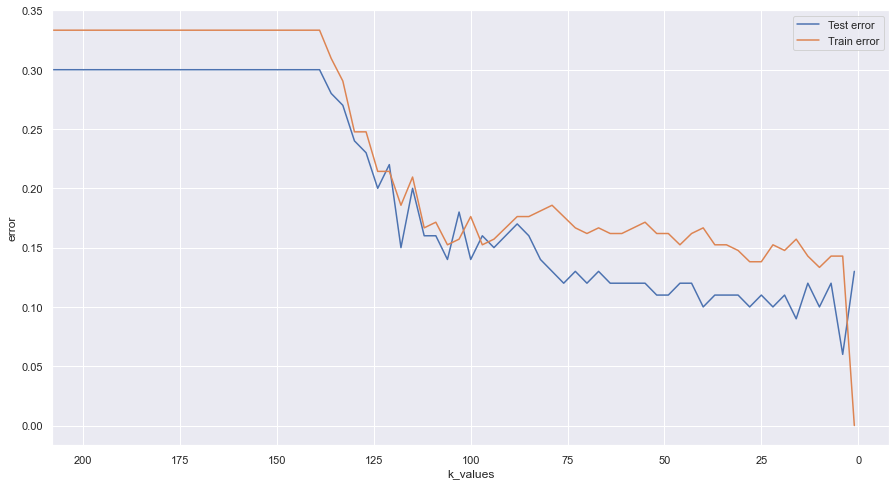

In [1432]:
plt.plot(range(208,0,-3),testing_error,range(208,0,-3),train_error)
plt.xlim(max(range(208,-10,-3)), min(range(208,-10,-3)))
plt.xlabel("k_values")
plt.ylabel("error")
plt.legend(["Test error", "Train error"])

k* = 4

In [1433]:
knnclasstrain = KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean')
knnclasstrain.fit(x_train,y_train.values.ravel())
predictedknn = knnclasstrain.predict(x_test)
accuracy = accuracy_score(y_test,predictedknn)
cmatrix = confusion_matrix(y_test,predictedknn)
precisionscore = precision_score(y_test,predictedknn)
f1score = f1_score(y_test,predictedknn)
truepositive_rate = cmatrix[1][1]/(cmatrix[1][0]+cmatrix[1][1])
truenegative_rate = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[0][1])
print("Confusion matrix = \n", cmatrix)
print("True Positive Rate =" , truepositive_rate)
print("True negative Rate =" , truenegative_rate)
print("Accuracy = " , accuracy)
print("Precision = " , precisionscore)
print("F1score = " , f1score)

Confusion matrix = 
 [[25  5]
 [ 1 69]]
True Positive Rate = 0.9857142857142858
True negative Rate = 0.8333333333333334
Accuracy =  0.94
Precision =  0.9324324324324325
F1score =  0.9583333333333333


1(c)(iii) Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}.Note: for each N, select your training set by choosing the first N/3 rows of Class 0 and the first N − N/3 rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve.

In [1434]:
main = []
for n in range(10,211,10):
    
    minvalue = 5
    a = []
    
    for k in range(1,n,5):
        abnor_df = abnormal_df.iloc[:(n-(math.floor(n/3))),:] #class 1 n-floor(n/3)
        nor_df = normal_df.iloc[:math.floor(n/3),:] #class 0 floor(n/3)
        training_df = pd.concat([abnor_df,nor_df])
        
        knnclasstrain = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
        knnclasstrain.fit(training_df.iloc[:,:6],training_df.iloc[:,7:].values.ravel())
        
        predictedknn = knnclasstrain.predict(x_test)
        cmatrix = confusion_matrix(y_test,predictedknn)
        testing_error = ((cmatrix[1][0] + cmatrix[0][1])/(cmatrix[0][0] + cmatrix[0][1] + cmatrix[1][0] + cmatrix[1][1]))

        #print(testing_error)
        if minvalue > testing_error:
            minvalue = testing_error
            a = [n,k,minvalue]
            
        
    main.append(a)
 
print(main) 

[[10, 1, 0.25], [20, 6, 0.2], [30, 1, 0.22], [40, 11, 0.25], [50, 26, 0.3], [60, 21, 0.29], [70, 26, 0.29], [80, 31, 0.29], [90, 41, 0.29], [100, 6, 0.25], [110, 6, 0.22], [120, 16, 0.17], [130, 16, 0.16], [140, 16, 0.15], [150, 16, 0.13], [160, 6, 0.13], [170, 6, 0.13], [180, 6, 0.1], [190, 6, 0.09], [200, 6, 0.09], [210, 6, 0.08]]


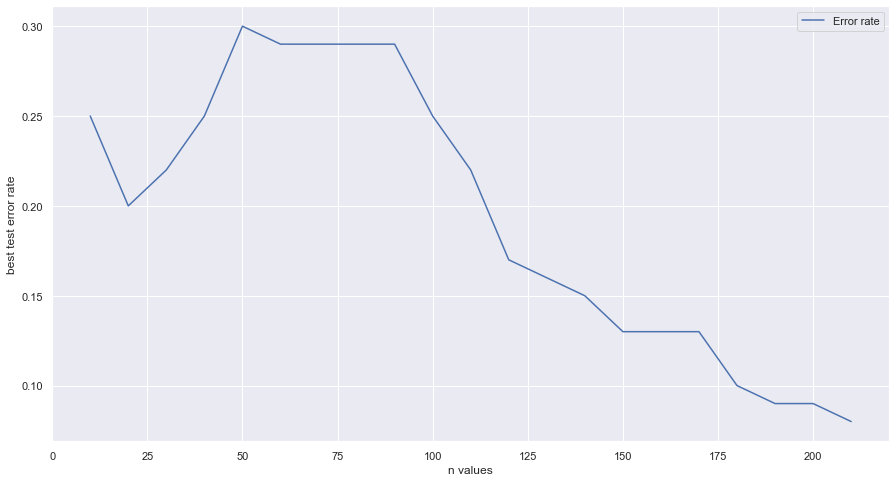

In [1435]:
plt.plot([main[i][0] for i in range(len(main))],[main[i][2] for i in range(len(main))])
plt.xlabel("n values")
plt.ylabel("best test error rate")
plt.legend(["Error rate"])
plt.show()

1(d)Replace the Euclidean metric with the following metrics5 and test them. Sum￾marize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.

1(d)(i) Minkowski Distance

In [1436]:
column_names = ["K*", "Testing error"]
test_errors = pd.DataFrame(columns = column_names)

In [1437]:
column_names = ["K*", "Training error"]
train_errors = pd.DataFrame(columns = column_names)
# train_errors

1(d)(i)(A) which becomes Manhattan Distance with p = 1.

In [1438]:
manhattan_testerror = []
manhattan_trainerror = []

minvalue1 = 10
minvalue2 = 10
val_test = []
val_train = []

for k in range(1,200,5):
    manhattan_knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p=1)
    manhattan_knn.fit(x_train,y_train.values.ravel())
    
    pred_knn_test = manhattan_knn.predict(x_test)
    cm_test = confusion_matrix(y_test,pred_knn_test)
    manhattan_testerror = ((cm_test[1][0] + cm_test[0][1])/(cm_test[0][0] + cm_test[0][1] + cm_test[1][0] + cm_test[1][1]))
    
#     train error
    pred_knn_train = manhattan_knn.predict(x_train)
    cm_train = confusion_matrix(y_train,pred_knn_train)
    manhattan_trainerror = ((cm_train[1][0] + cm_train[0][1])/(cm_train[0][0] + cm_train[0][1] + cm_train[1][0] + cm_train[1][1]))
    
    if minvalue1 > manhattan_testerror:
        minvalue1 = manhattan_testerror
        val_test = [k,minvalue1]
    
    if ((minvalue2 > manhattan_trainerror) and (k !=1)):
        minvalue2 = manhattan_trainerror
        val_train = [k,minvalue2]

print("Test error : " , val_test)
print("Train error : " , val_train)

Test error :  [6, 0.11]
Train error :  [16, 0.13333333333333333]


In [1439]:
test_errors.loc["Manhattan test error"] = val_test
# test_errors

In [1440]:
train_errors.loc["Manhattan train error"] = val_train
# train_errors

1(d)(i)(B) with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k∗ you foundfor the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [1441]:
i = 0.1

minvalue1 = 10
val_test = []
minvalue2 = 10
val_train = []

while i <= 1:
    minkowskilog_knn = KNeighborsClassifier(n_neighbors=6, metric = 'minkowski', p =math.pow(10,i))
    minkowskilog_knn.fit(x_train,y_train.values.ravel())
    
    predlog_knn_test = minkowskilog_knn.predict(x_test)
    log_cm_test = confusion_matrix(y_test,predlog_knn_test)
    log_testerror = ((log_cm_test[1][0] + log_cm_test[0][1])/(log_cm_test[0][0] + log_cm_test[0][1] + log_cm_test[1][0] + log_cm_test[1][1]))
    
#     train error
    predlog_knn_train = minkowskilog_knn.predict(x_train)
    log_cm_train = confusion_matrix(y_train,predlog_knn_train)
    log_trainerror = ((log_cm_train[1][0] + log_cm_train[0][1])/(log_cm_train[0][0] + log_cm_train[0][1] + log_cm_train[1][0] + log_cm_train[1][1]))
    
    if minvalue1 > log_testerror:
        minvalue1 = log_testerror
        val_test = [i,minvalue1]
        
    if ((minvalue2 > log_trainerror) and (i != 1)):
        minvalue2 = log_trainerror
        val_train = [i,minvalue2]
        
    i = round(i+0.1,2)

print("Test error : ", val_test)
print("Train error : ", val_train)

Test error :  [0.6, 0.06]
Train error :  [0.1, 0.1380952380952381]


In [1442]:
print("Best log10(p) : ", val_test[0])
print("Test error = " , val_test[1])
print("When k* = 6")

Best log10(p) :  0.6
Test error =  0.06
When k* = 6


In [1443]:
test_errors.loc["Minkowski log test error"] = val_test
# test_errors

In [1444]:
train_errors.loc["Minkowski log train error"] = val_train
# train_errors

1(d)(i)(C) which becomes Chebyshev Distance with p → ∞

In [1445]:
minvalue1 = 10
val_test = []
minvalue2 = 10
val_train = []

for k in range(1,200,5):
    Chebyshev_knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p=math.inf)
    Chebyshev_knn.fit(x_train,y_train.values.ravel())
    
    predcheb_knn_test = Chebyshev_knn.predict(x_test)
    chebyshev_cm_test = confusion_matrix(y_test,predcheb_knn_test)
    chebyshev_testerror = ((chebyshev_cm_test[1][0] + chebyshev_cm_test[0][1])/(chebyshev_cm_test[0][0] + chebyshev_cm_test[0][1] + chebyshev_cm_test[1][0] + chebyshev_cm_test[1][1]))
    
#     train error
    predcheb_knn_train = Chebyshev_knn.predict(x_train)
    chebyshev_cm_train = confusion_matrix(y_train,predcheb_knn_train)
    chebyshev_trainerror = ((chebyshev_cm_train[1][0] + chebyshev_cm_train[0][1])/(chebyshev_cm_train[0][0] + chebyshev_cm_train[0][1] + chebyshev_cm_train[1][0] + chebyshev_cm_train[1][1]))

    if minvalue1 > chebyshev_testerror:
        minvalue1 = chebyshev_testerror
        val_test = [k,minvalue1]
    
    if ((minvalue2 > chebyshev_trainerror) and (k !=1)):
        minvalue2 = chebyshev_trainerror
        val_train = [k,minvalue2]

print("Test error : ", val_test)
print("Train error : ", val_train)

Test error :  [16, 0.08]
Train error :  [21, 0.13333333333333333]


In [1446]:
test_errors.loc["Minkowski Chebyshev test error"] = val_test
# test_errors

In [1447]:
train_errors.loc["Minkowski Chebyshev train error"] = val_train
# train_errors

1(d)(ii) Mahalanobis Distance

In [1448]:
minvalue1 = 10
val_test = []

minvalue2 = 10
val_train = []

for k in range(1,200,5):
    mahalanobis_knn=KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': np.cov(x_train, rowvar=False)})
    mahalanobis_knn.fit(x_train,y_train.values.ravel())
    
    predmaha_knn_train = mahalanobis_knn.predict(x_test)
    maha_cm_test = confusion_matrix(y_test,predmaha_knn_train)
    maha_testerror = ((maha_cm_test[1][0] + maha_cm_test[0][1])/(maha_cm_test[0][0] + maha_cm_test[0][1] + maha_cm_test[1][0] + maha_cm_test[1][1]))
    
#     train error
    predmaha_knn_train = mahalanobis_knn.predict(x_train)
    maha_cm_train = confusion_matrix(y_train,predmaha_knn_train)
    maha_trainerror = ((maha_cm_train[1][0] + maha_cm_train[0][1])/(maha_cm_train[0][0] + maha_cm_train[0][1] + maha_cm_train[1][0] + maha_cm_train[1][1]))
    
    if minvalue1 > maha_testerror:
        minvalue1 = maha_testerror
        val_test = [k,minvalue1]
    
    if ((minvalue2 > maha_trainerror) and (k != 1)):
        minvalue2 = maha_trainerror
        val_train = [k,minvalue2]

print("Test error : ", val_test)
print("Train error : ", val_train)

Test error :  [6, 0.08]
Train error :  [11, 0.13333333333333333]


In [1449]:
test_errors.loc["Mahalanobis test error"] = val_test
# test_errors

In [1450]:
train_errors.loc["Mahalanobis train error"] = val_train
# train_errors

In [1451]:
print("Summary of Testing errors when k = k*")
test_errors

Summary of Testing errors when k = k*


,K*,Testing error
Manhattan test error,6.0,0.11
Minkowski log test error,0.6,0.06
Minkowski Chebyshev test error,16.0,0.08
Mahalanobis test error,6.0,0.08


1(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}

In [1452]:
column_names = ["K*", "Testing error"]
weighted_test_errors = pd.DataFrame(columns = column_names)
# weighted_test_errors

In [1453]:
minvalue1 = 10
val_test = []
minvalue2 = 10
val_train = []
for k in range(1,200,5):    
    knnclasstrain = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean', weights = 'distance')
    knnclasstrain.fit(x_train,y_train.values.ravel())
    
    pred_knn_test = knnclasstrain.predict(x_test)
    cmatrix_test = confusion_matrix(y_test,pred_knn_test)
    testing_error = ((cmatrix_test[1][0] + cmatrix_test[0][1])/(cmatrix_test[0][0] + cmatrix_test[0][1] + cmatrix_test[1][0] + cmatrix_test[1][1]))

#     train error
    pred_knn_train = knnclasstrain.predict(x_train)
    cmatrix_train = confusion_matrix(y_train,pred_knn_train)
    training_error = ((cmatrix_train[1][0] + cmatrix_train[0][1])/(cmatrix_train[0][0] + cmatrix_train[0][1] + cmatrix_train[1][0] + cmatrix_train[1][1]))
    
    if minvalue1 > testing_error:
        minvalue1 = testing_error
        val_test = [k,minvalue1]
    
    if ((minvalue2 > training_error) and (k !=1)):
        minvalue2 = training_error
        val_train = [k,minvalue2]

print("Test error : ", val_test) 
print("Train error : ", val_train) 

Test error :  [6, 0.1]
Train error :  [6, 0.0]


In [1454]:
weighted_test_errors.loc["Euclidean test error"] = val_test
# weighted_test_errors

In [1455]:
train_errors.loc["Euclidean weighted train error"] = val_train
# train_errors

In [1456]:
minvalue1 = 10
val_test = []
minvalue2 = 10
val_train = []
for k in range(1,200,5):
    manhattan_knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p=1, weights = 'distance')
    manhattan_knn.fit(x_train,y_train.values.ravel())
    
    pred_knn_test = manhattan_knn.predict(x_test)
    cmatrix_test = confusion_matrix(y_test,pred_knn_test)
    testing_error = ((cmatrix_test[1][0] + cmatrix_test[0][1])/(cmatrix_test[0][0] + cmatrix_test[0][1] + cmatrix_test[1][0] + cmatrix_test[1][1]))

    pred_knn_train = manhattan_knn.predict(x_train)
    cmatrix_train = confusion_matrix(y_train,pred_knn_train)
    training_error = ((cmatrix_train[1][0] + cmatrix_train[0][1])/(cmatrix_train[0][0] + cmatrix_train[0][1] + cmatrix_train[1][0] + cmatrix_train[1][1]))
    
    if minvalue1 > testing_error:
        minvalue1 = testing_error
        val_test = [k,minvalue1]
    
    if ((minvalue2 > training_error) and (k != 1)):
        minvalue2 = training_error
        val_train = [k,minvalue2]

print("Test error : ", val_test)
print("Train error : ", val_train)

Test error :  [26, 0.1]
Train error :  [6, 0.0]


In [1457]:
weighted_test_errors.loc["Manhattan test error"] = val_test
# weighted_test_errors

In [1458]:
train_errors.loc["Manhattan weighted train error"] = val_train
# train_errors

In [1459]:
minvalue1 = 10
val_test = []
minvalue2 = 10
val_train = []
for k in range(1,200,5):
    chebyshev_knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p=math.inf, weights = 'distance')
    chebyshev_knn.fit(x_train,y_train.values.ravel())
    
    predcheb_knn_test = chebyshev_knn.predict(x_test)
    chebyshev_cm_test = confusion_matrix(y_test,predcheb_knn_test)
    testing_error = ((chebyshev_cm_test[1][0] + chebyshev_cm_test[0][1])/(chebyshev_cm_test[0][0] + chebyshev_cm_test[0][1] + chebyshev_cm_test[1][0] + chebyshev_cm_test[1][1]))
    
#     train error
    predcheb_knn_train = chebyshev_knn.predict(x_train)
    chebyshev_cm_train = confusion_matrix(y_train,predcheb_knn_train)
    training_error = ((chebyshev_cm_train[1][0] + chebyshev_cm_train[0][1])/(chebyshev_cm_train[0][0] + chebyshev_cm_train[0][1] + chebyshev_cm_train[1][0] + chebyshev_cm_train[1][1]))
    
    if minvalue1 > testing_error:
        minvalue1 = testing_error
        val_test = [k,minvalue1]
    
    if ((minvalue2 > training_error) and (k != 1)):
        minvalue2 = training_error
        val_train = [k,minvalue2]

print("Test error : ", val_test)
print("Train error : ", val_train)

Test error :  [16, 0.11]
Train error :  [6, 0.0]


In [1460]:
weighted_test_errors.loc["Chebyshev test error"] = val_test
# weighted_test_errors

In [1461]:
train_errors.loc["Chebyshev weighted train error"] = val_train
# train_errors

In [1462]:
print("Weighted Voting Testing error")
weighted_test_errors

Weighted Voting Testing error


,K*,Testing error
Euclidean test error,6.0,0.10
Manhattan test error,26.0,0.10
Chebyshev test error,16.0,0.11


In [1463]:
min_TE = weighted_test_errors["Testing error"]
min_TE_val = min_TE.min()
# min_TE_val
# max_k_val = max_k.max()
min_err = weighted_test_errors.loc[weighted_test_errors["Testing error"] == min_TE_val]
min_err

,K*,Testing error
Euclidean test error,6.0,0.1
Manhattan test error,26.0,0.1


In [1464]:
max_k = min_err["K*"]
max_k_val = max_k.max()
max_k_val

26.0

1(e) Best test error for weighted voting 

In [1465]:
print("Best test error for weighted voting is :")
print("k* = " , max_k_val)
print("Testing error = ", min_TE_val)

Best test error for weighted voting is :
k* =  26.0
Testing error =  0.1


In [1466]:
print("Summary of Training errors")
train_errors

Summary of Training errors


,K*,Training error
Manhattan train error,16.0,0.133333
Minkowski log train error,0.1,0.138095
Minkowski Chebyshev train error,21.0,0.133333
Mahalanobis train error,11.0,0.133333
Euclidean weighted train error,6.0,0.000000
Manhattan weighted train error,6.0,0.000000
Chebyshev weighted train error,6.0,0.000000


1(f) What is the lowest training error rate you achieved in this homework?

In [1467]:
print("Lowest training error achieved in this home work(when k != 1) :")
min_train = train_errors['Training error']
min_train_val = min_train.min()
min_train_error = train_errors.loc[train_errors['Training error'] == min_train_val]
min_train_error

Lowest training error achieved in this home work(when k != 1) :


,K*,Training error
Euclidean weighted train error,6.0,0.0
Manhattan weighted train error,6.0,0.0
Chebyshev weighted train error,6.0,0.0
